In [36]:
!pip uninstall umap
!pip install umap-learn
!pip install matplotlib
import pandas as pd
import numpy as np
import gensim
import umap.umap_ as umap
import matplotlib.pyplot as plt

Skipping umap as it is not installed.


In [55]:
board_df = pd.read_hdf('../data/10k_no_play.h5')
word2vec_model = model = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)  

In [62]:
game = board_df.iloc[0]
cards = game['cards']

In [58]:
game_card_vectors = [word2vec_model[word.lower()] for word in cards]
blue_positions=game['blue_positions']
red_positions=game['red_positions']
neutral_positions=game['neutral_positions']
assassin_positions=game['assassin_positions']


In [89]:
all_cards = np.concatenate(board_df.cards.values)
all_cards = [c.strip() for c in all_cards]
all_card_vectors = [word2vec_model[word.lower()] for word in all_cards]


KeyError: "word 'loch ness' not in vocabulary"

In [91]:
word2vec_model.vocab

{'</s>': <gensim.models.keyedvectors.Vocab at 0x1b53504bef0>,
 'in': <gensim.models.keyedvectors.Vocab at 0x1b5646e1400>,
 'for': <gensim.models.keyedvectors.Vocab at 0x1b56445f400>,
 'that': <gensim.models.keyedvectors.Vocab at 0x1b56445fbe0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x1b56445f630>,
 'on': <gensim.models.keyedvectors.Vocab at 0x1b56445f470>,
 '##': <gensim.models.keyedvectors.Vocab at 0x1b56445f5c0>,
 'The': <gensim.models.keyedvectors.Vocab at 0x1b56445f780>,
 'with': <gensim.models.keyedvectors.Vocab at 0x1b56445f9b0>,
 'said': <gensim.models.keyedvectors.Vocab at 0x1b53276f6a0>,
 'was': <gensim.models.keyedvectors.Vocab at 0x1b564474080>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1b56446f9e8>,
 'at': <gensim.models.keyedvectors.Vocab at 0x1b564505eb8>,
 'not': <gensim.models.keyedvectors.Vocab at 0x1b5644f7668>,
 'as': <gensim.models.keyedvectors.Vocab at 0x1b5644f7b00>,
 'it': <gensim.models.keyedvectors.Vocab at 0x1b56466b208>,
 'be': <gensim.models.keyed

In [85]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(all_words)

ValueError: could not convert string to float: 'LIFE'

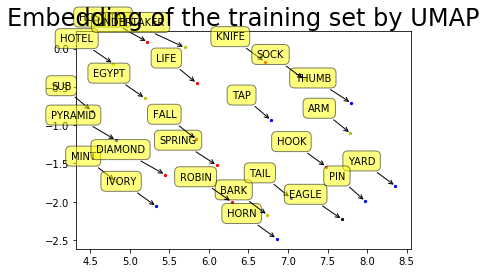

In [64]:
plt.scatter(trans.embedding_[blue_positions, 0], trans.embedding_[blue_positions, 1], s= 5,c='b', cmap='Spectral')
plt.scatter(trans.embedding_[red_positions, 0], trans.embedding_[red_positions, 1], s= 5,c='r', cmap='Spectral')
plt.scatter(trans.embedding_[neutral_positions, 0], trans.embedding_[neutral_positions, 1], s= 5,c='y', cmap='Spectral')
plt.scatter(trans.embedding_[assassin_positions, 0], trans.embedding_[assassin_positions, 1], s= 5,c='k', cmap='Spectral')

for label, x, y in zip(cards, trans.embedding_[:, 0], trans.embedding_[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [45]:
blue_positions

[0, 5, 11, 0, 15, 1, 5, 9, 24]